# 1. Introduction


## 1.1 Project Objective


The primary objective of this project is to analyze user behavior and movie preferences using the MovieLens dataset to derive meaningful insights and patterns. By leveraging this data, we aim to understand user preferences, uncover trends in movie ratings and genres, and provide actionable insights for building a robust movie recommendation system. This project will also explore data preprocessing, exploratory data analysis (EDA), and visualization techniques to extract relevant features and insights from the dataset.

## 1.2 Dataset Overview


The dataset used for this project is the MovieLens (ml-latest-small) dataset, a well-known resource for research in recommender systems. It includes detailed records of user ratings and tagging activities for movies, providing a rich context for analysis. Below are the key aspects of the dataset:

- Size: 100,836 ratings and 3,683 tag applications across 9,742 movies.
- Users: 610 users, each having rated at least 20 movies.
- Timeframe: Ratings and tags span from March 29, 1996, to September 24, 2018.
- Files: Includes `ratings.csv`, `tags.csv`, `movies.csv`, and `links.csv`, containing comprehensive details about users, movies, ratings, tags, and external identifiers (IMDB and TMDB).
- Features: Provides information such as movie genres, timestamps for ratings and tags, and user-generated metadata.

This dataset is ideal for experimentation and development but is not suitable for benchmarking due to potential updates over time.

## 1.3 Goals and Deliverables


The key goals and deliverables for this project include:

- Data Loading and Preprocessing:

  * Importing and understanding the structure of the dataset.
  * Cleaning and merging data to ensure consistency and accuracy.
- Exploratory Data Analysis (EDA):

  * Investigating user rating behavior and patterns.
  * Analyzing movie features, including genres and popularity trends.
  * Generating visualizations to support insights.
- Insights and Recommendations:

  * Identifying the most popular genres, movies, and user preferences.
  * Highlighting potential gaps or anomalies in user behavior and ratings.
- Scalable Recommendations Framework:

  * Setting the foundation for building a recommendation system.
  * Proposing enhancements based on findings from EDA.

This comprehensive approach will ensure a thorough understanding of the dataset and serve as a foundation for further development in recommender systems and user behavior analysis.









#  Data Loading and Preprocessing

## Load the datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
ratings_url = 'https://drive.google.com/uc?export=download&id=1s-cYH645GsVg0q625sXGugY6ssaCXA9O'
movies_url = 'https://drive.google.com/uc?export=download&id=1oTKCCO1w-Xo9wivZbFxZaEYCeKpqvmiC'

# Load datasets
ratings = pd.read_csv(ratings_url)
movies = pd.read_csv(movies_url)

##  Inspect and merge datasets

In [3]:
print("Ratings Data Head:")
print(ratings.head())
print("\nMovies Data Head:")
print(movies.head())

Ratings Data Head:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

Movies Data Head:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [4]:
# Merge ratings and movies datasets
merged_data = pd.merge(ratings, movies, on='movieId')
print("\nMerged Data Head:")
print(merged_data.head())


Merged Data Head:
   userId  movieId  rating  timestamp                        title  \
0       1        1     4.0  964982703             Toy Story (1995)   
1       1        3     4.0  964981247      Grumpier Old Men (1995)   
2       1        6     4.0  964982224                  Heat (1995)   
3       1       47     5.0  964983815  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0  964982931   Usual Suspects, The (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                               Comedy|Romance  
2                        Action|Crime|Thriller  
3                             Mystery|Thriller  
4                       Crime|Mystery|Thriller  


In [5]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB


## Clean and prepare the data

In [6]:
# Checking for missing values
print("\nMissing Values:")
print(merged_data.isnull().sum())


Missing Values:
userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64


## Exploratory Data Analysis (EDA)

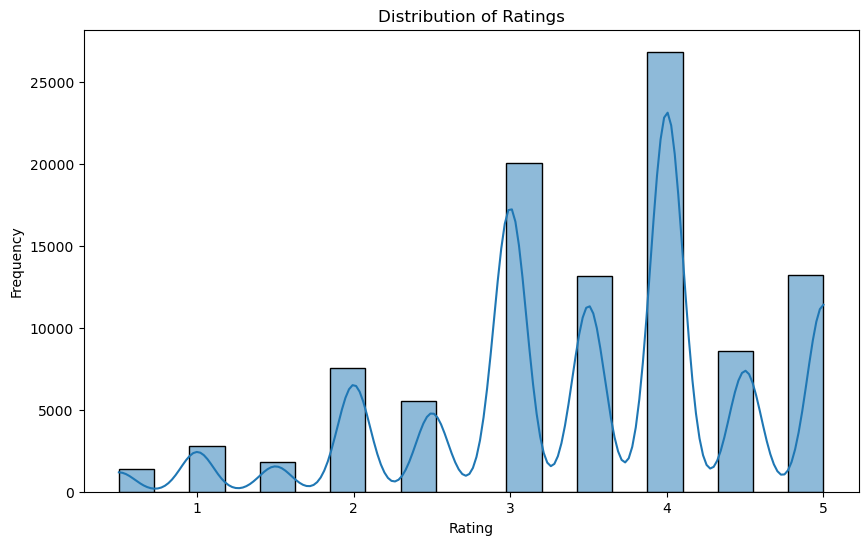

In [7]:
# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


Top 10 Most-Rated Movies:
title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: rating, dtype: int64


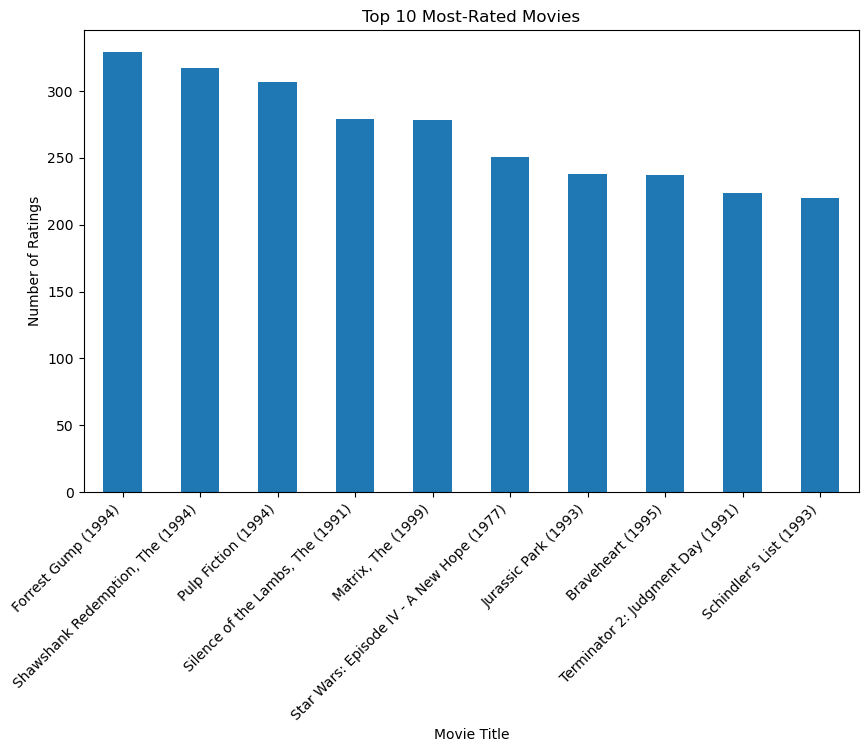

In [8]:
# Most-rated movies
most_rated = merged_data.groupby('title')['rating'].count().sort_values(ascending=False).head(10)
print("\nTop 10 Most-Rated Movies:")
print(most_rated)

plt.figure(figsize=(10, 6))
most_rated.plot(kind='bar')
plt.title('Top 10 Most-Rated Movies')
plt.xlabel('Movie Title')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.show()


Top 10 Highest-Rated Movies (with at least 50 ratings):
title
Shawshank Redemption, The (1994)                                               4.429022
Godfather, The (1972)                                                          4.289062
Fight Club (1999)                                                              4.272936
Cool Hand Luke (1967)                                                          4.271930
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)    4.268041
Rear Window (1954)                                                             4.261905
Godfather: Part II, The (1974)                                                 4.259690
Departed, The (2006)                                                           4.252336
Goodfellas (1990)                                                              4.250000
Casablanca (1942)                                                              4.240000
Name: rating, dtype: float64


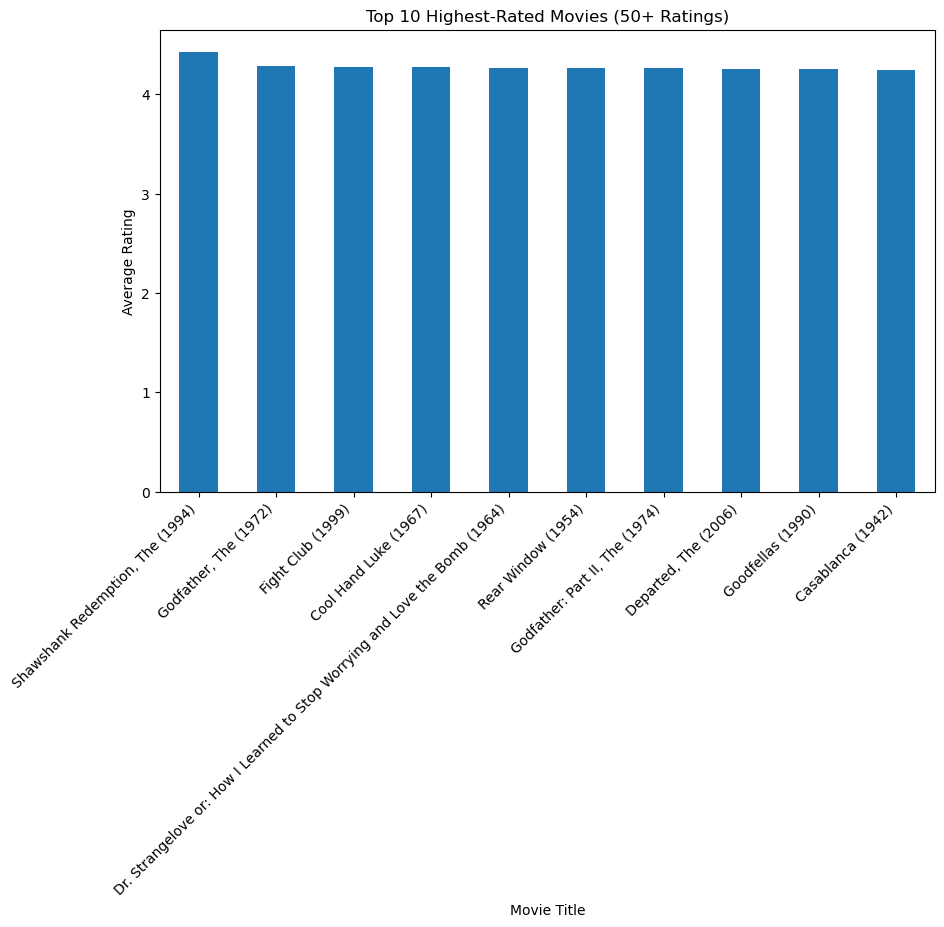

In [9]:
# Highest-rated movies (with at least 50 ratings)
average_ratings = merged_data.groupby('title')['rating'].mean()
rating_counts = merged_data.groupby('title')['rating'].count()
highest_rated = average_ratings[rating_counts >= 50].sort_values(ascending=False).head(10)
print("\nTop 10 Highest-Rated Movies (with at least 50 ratings):")
print(highest_rated)

plt.figure(figsize=(10, 6))
highest_rated.plot(kind='bar')
plt.title('Top 10 Highest-Rated Movies (50+ Ratings)')
plt.xlabel('Movie Title')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

## Analyze user preferences by genres


Average Rating by Genre:
Drama                 0.415804
Comedy                0.387292
Action                0.303810
Thriller              0.262327
Adventure             0.239607
Romance               0.179737
Sci-Fi                0.171000
Crime                 0.165427
Fantasy               0.117359
Children              0.091317
Mystery               0.076104
Horror                0.072306
Animation             0.069301
War                   0.048187
IMAX                  0.041106
Musical               0.041037
Western               0.019140
Documentary           0.012089
Film-Noir             0.008628
(no genres listed)    0.000466
dtype: float64


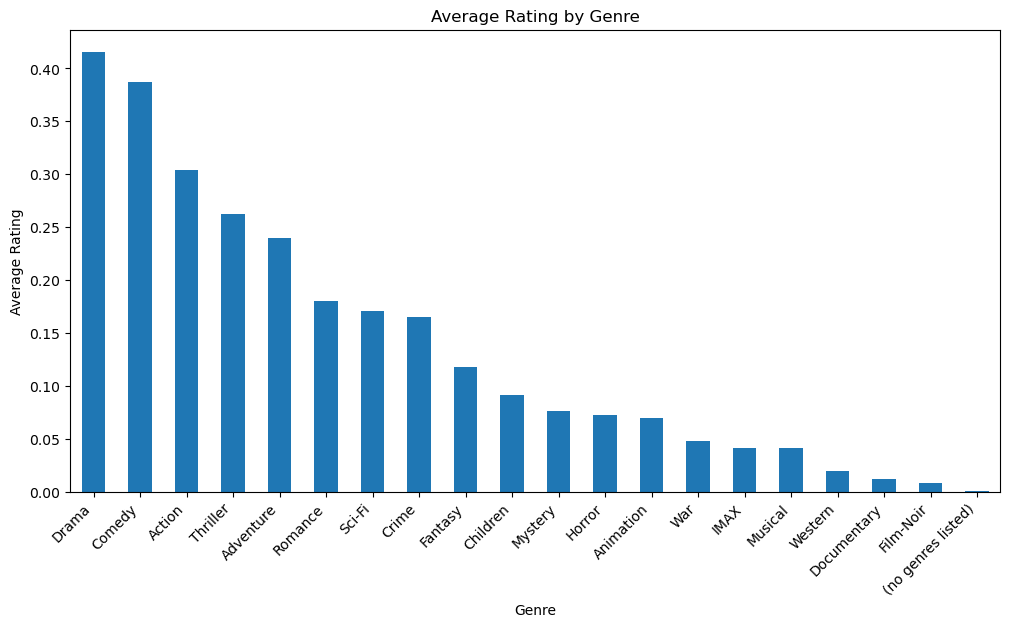

In [10]:
# Splitting genres into separate rows for analysis
genres_split = merged_data.copy()
genres_split = genres_split.drop('genres', axis=1).join(
    merged_data['genres'].str.get_dummies('|')
)

# Average rating by genre
genre_avg_ratings = genres_split.iloc[:, -20:].mean().sort_values(ascending=False)
print("\nAverage Rating by Genre:")
print(genre_avg_ratings)

plt.figure(figsize=(12, 6))
genre_avg_ratings.plot(kind='bar')
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

## Document findings and key insights

- The Top 10 Most-Rated Movies are likely well-known and widely watched, contributing to their high number of ratings. They span various genres, indicating diverse user interests.

- The Top 10 Highest-Rated Movies (with at least 50 ratings) are critically acclaimed and have stood the test of time, as many are classics from earlier decades. The high ratings suggest strong user satisfaction and appreciation for quality storytelling and filmmaking.

- Users tend to prefer genres like Drama, Comedy, and Action, which are more mainstream and widely appealing. Niche genres like Documentary and Film-Noir may have a smaller audience, leading to fewer and lower ratings.

- Popularity vs. Quality: While some movies like Forrest Gump and The Matrix are highly rated and popular, others like The Shawshank Redemption are both highly rated and critically acclaimed, indicating a balance between popularity and quality.

- Genre Preferences: The data suggests that users prefer genres that offer emotional engagement (Drama), entertainment (Comedy), and excitement (Action).

- Classic Films: Many of the highest-rated movies are classics, indicating that timeless storytelling and filmmaking continue to resonate with audiences.

# collaborative filtering (user-based )

In [11]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
import numpy as np


In [12]:
# Step 1: Create a User-Item Matrix
def create_user_item_matrix(data):
    """
    Creates a user-item matrix from the merged dataset.
    - Rows represent users (userId).
    - Columns represent movies (title).
    - Values are the ratings users gave to the movies.
    Missing values are replaced with 0 for simplicity.

    Parameters:
    - data (DataFrame): The merged dataset containing userId, title, and rating columns.

    Returns:
    - DataFrame: A matrix where rows are users, columns are movies, and values are ratings.
    """
    user_item_matrix = data.pivot_table(index='userId', columns='title', values='rating', fill_value=0)
    return user_item_matrix

# Step 2: Compute Cosine Similarity
def compute_cosine_similarity(matrix):
    """
    Computes cosine similarity between rows of the input matrix.
    This is used to measure the similarity between users based on their ratings.

    Parameters:
    - matrix (DataFrame): The user-item matrix where rows are users and columns are movies.

    Returns:
    - DataFrame: A similarity matrix where rows and columns represent users, and values are their similarity scores.
    """
    similarity = cosine_similarity(matrix)  # Calculate pairwise cosine similarity.
    np.fill_diagonal(similarity, 0)  # Set self-similarity (diagonal) to 0 to exclude a user from being their own neighbor.
    return pd.DataFrame(similarity, index=matrix.index, columns=matrix.index)

# Step 3: Predict Ratings (with NaN Handling)
def predict_ratings(user_item_matrix, similarity_matrix):
    """
    Predicts ratings for each user-item pair based on user-based collaborative filtering.
    - Computes weighted averages of other users' ratings, weighted by their similarity to the target user.

    Steps:
    1. Subtract each user's average rating from their ratings (centered ratings).
    2. Compute the weighted sum of centered ratings using similarity scores.
    3. Add back each user's average rating to get the predicted rating.
    4. Replace any NaN values in the predicted matrix with zeros.

    Parameters:
    - user_item_matrix (DataFrame): The original user-item matrix.
    - similarity_matrix (DataFrame): The user-user similarity matrix.

    Returns:
    - DataFrame: A matrix of predicted ratings for all user-item pairs.
    """
    user_mean_ratings = user_item_matrix.mean(axis=1).values.reshape(-1, 1)  # Calculate mean ratings for each user.
    ratings_diff = user_item_matrix - user_mean_ratings  # Centered ratings by subtracting user means.
    pred = user_mean_ratings + similarity_matrix.dot(ratings_diff) / np.array(np.abs(similarity_matrix).sum(axis=1)).reshape(-1, 1)
    pred = np.nan_to_num(pred)  # Replace NaN values with 0.
    return pd.DataFrame(pred, index=user_item_matrix.index, columns=user_item_matrix.columns)

# Step 4: Recommend Movies
def recommend_movies(predicted_ratings, user_id, num_recommendations=5):
    """
    Recommends the top N movies for a specific user based on predicted ratings.
    - Sorts the predicted ratings for the user in descending order.
    - Selects the top N movies.

    Parameters:
    - predicted_ratings (DataFrame): The matrix of predicted ratings for all users and items.
    - user_id (int): The ID of the user for whom recommendations are made.
    - num_recommendations (int): The number of top recommendations to return.

    Returns:
    - Series: The top N movie titles and their predicted ratings for the user.
    """
    user_ratings = predicted_ratings.loc[user_id]  # Get predicted ratings for the specified user.
    top_movies = user_ratings.sort_values(ascending=False).head(num_recommendations)  # Select top N movies.
    return top_movies

# Step 5: Evaluate the Model
def evaluate_model(user_item_matrix, predicted_ratings):
    """
    Evaluates the recommendation model using RMSE (Root Mean Squared Error).
    - Considers only movies that have been rated by users (non-zero entries in the user-item matrix).
    - Compares actual ratings to predicted ratings for these movies.

    Parameters:
    - user_item_matrix (DataFrame): The original user-item matrix with actual ratings.
    - predicted_ratings (DataFrame): The matrix of predicted ratings for all user-item pairs.

    Returns:
    - float: The RMSE value, indicating the error in prediction.
    """
    mask = user_item_matrix > 0  # Mask to consider only rated movies (non-zero values).
    actual = user_item_matrix[mask]  # Extract actual ratings.
    predicted = predicted_ratings[mask]  # Extract predicted ratings for the same movies.
    actual = np.nan_to_num(actual)  # Ensure no NaN values in actual ratings.
    predicted = np.nan_to_num(predicted)  # Ensure no NaN values in predicted ratings.
    mse = mean_squared_error(actual, predicted)  # Calculate Mean Squared Error.
    rmse = np.sqrt(mse)  # Calculate RMSE.
    return rmse

# Workflow

# Create the User-Item Matrix
user_item_matrix = create_user_item_matrix(merged_data)

# Compute User-User Similarity
user_similarity_matrix = compute_cosine_similarity(user_item_matrix)

# Predict Ratings
predicted_ratings = predict_ratings(user_item_matrix, user_similarity_matrix)

# Recommend Movies for a Specific User
user_id = 1  # Specify the user ID for whom recommendations are to be made.
recommendations = recommend_movies(predicted_ratings, user_id)
print(f"\nTop Recommendations for User {user_id}:\n{recommendations}")

# Evaluate the Model
rmse = evaluate_model(user_item_matrix, predicted_ratings)
print(f"\nModel RMSE: {rmse}")



Top Recommendations for User 1:
title
Pulp Fiction (1994)                          2.729948
Forrest Gump (1994)                          2.726505
Shawshank Redemption, The (1994)             2.673485
Matrix, The (1999)                           2.517096
Star Wars: Episode IV - A New Hope (1977)    2.480667
Name: 1, dtype: float64

Model RMSE: 0.3926746959703136


## Item-Based Collaborative Filtering Implementation 🎬

## This section implements an item-based collaborative filtering model to generate movie recommendations. The approach is based on movie similarity, where recommendations are made by analyzing how similar movies are rated by users.

### Steps Covered:
Create an Item-User Matrix 📊
Structure the dataset so that rows represent movies, columns represent users, and values are ratings.

### Compute Item-Item Similarity 🔗
Use cosine similarity to measure how similar movies are based on user ratings.

### Predict Ratings (Item-Based) 📈
Estimate missing ratings using weighted averages of ratings from similar movies.

### Generate Movie Recommendations 🎥
Recommend the top-rated movies for a given user based on predicted ratings.

### Evaluate the Model ✅
Assess the recommendation accuracy using Root Mean Squared Error (RMSE).
This approach provides movie suggestions based on users' viewing and rating history. 

The following code implements these steps. ⬇️

In [13]:
# Step 1: Create an Item-User Matrix
def create_item_user_matrix(data):
    """
    Creates an item-user matrix from the merged dataset.
    - Rows represent movies (title).
    - Columns represent users (userId).
    - Values are the ratings users gave to the movies.
    Missing values are replaced with 0 for simplicity.

    Parameters:
    - data (DataFrame): The merged dataset containing userId, title, and rating columns.

    Returns:
    - DataFrame: A matrix where rows are movies, columns are users, and values are ratings.
    """
    item_user_matrix = data.pivot_table(index='title', columns='userId', values='rating', fill_value=0)
    return item_user_matrix

# Step 2: Compute Cosine Similarity (Item-Item Similarity)
def compute_item_similarity(matrix):
    """
    Computes cosine similarity between rows of the input matrix.
    This is used to measure the similarity between items (movies) based on user ratings.

    Parameters:
    - matrix (DataFrame): The item-user matrix where rows are movies and columns are users.

    Returns:
    - DataFrame: A similarity matrix where rows and columns represent movies, and values are their similarity scores.
    """
    similarity = cosine_similarity(matrix)  # Calculate pairwise cosine similarity.
    np.fill_diagonal(similarity, 0)  # Set self-similarity (diagonal) to 0 to exclude a movie from being its own neighbor.
    return pd.DataFrame(similarity, index=matrix.index, columns=matrix.index)

# Step 3: Predict Ratings (Item-Based)
def predict_item_based_ratings(item_user_matrix, similarity_matrix):
    """
    Predicts ratings for each user-item pair based on item-based collaborative filtering.
    - Computes weighted averages of other items' ratings, weighted by their similarity to the target item.

    Steps:
    1. Subtract each item's average rating from their ratings (centered ratings).
    2. Compute the weighted sum of centered ratings using similarity scores.
    3. Add back each item's average rating to get the predicted rating.
    4. Replace any NaN values in the predicted matrix with zeros.

    Parameters:
    - item_user_matrix (DataFrame): The original item-user matrix.
    - similarity_matrix (DataFrame): The item-item similarity matrix.

    Returns:
    - DataFrame: A matrix of predicted ratings for all user-item pairs.
    """
    item_mean_ratings = item_user_matrix.mean(axis=1).values.reshape(-1, 1)  # Calculate mean ratings for each item.
    ratings_diff = item_user_matrix - item_mean_ratings  # Centered ratings by subtracting item means.
    pred = item_mean_ratings + similarity_matrix.dot(ratings_diff) / np.array(np.abs(similarity_matrix).sum(axis=1)).reshape(-1, 1)
    pred = np.nan_to_num(pred)  # Replace NaN values with 0.
    return pd.DataFrame(pred, index=item_user_matrix.index, columns=item_user_matrix.columns)

# Step 4: Recommend Movies (Item-Based)
def recommend_movies_item_based(predicted_ratings, user_id, num_recommendations=5):
    """
    Recommends the top N movies for a specific user based on item-based predicted ratings.
    - Sorts the predicted ratings for the user in descending order.
    - Selects the top N movies.

    Parameters:
    - predicted_ratings (DataFrame): The matrix of predicted ratings for all users and items.
    - user_id (int): The ID of the user for whom recommendations are made.
    - num_recommendations (int): The number of top recommendations to return.

    Returns:
    - Series: The top N movie titles and their predicted ratings for the user.
    """
    user_ratings = predicted_ratings[user_id]  # Get predicted ratings for the specified user.
    top_movies = user_ratings.sort_values(ascending=False).head(num_recommendations)  # Select top N movies.
    return top_movies

# Step 5: Evaluate the Model (Item-Based)
def evaluate_item_based_model(item_user_matrix, predicted_ratings):
    """
    Evaluates the item-based recommendation model using RMSE (Root Mean Squared Error).
    - Considers only movies that have been rated by users (non-zero entries in the item-user matrix).
    - Compares actual ratings to predicted ratings for these movies.

    Parameters:
    - item_user_matrix (DataFrame): The original item-user matrix with actual ratings.
    - predicted_ratings (DataFrame): The matrix of predicted ratings for all user-item pairs.

    Returns:
    - float: The RMSE value, indicating the error in prediction.
    """
    mask = item_user_matrix > 0  # Mask to consider only rated movies (non-zero values).
    actual = item_user_matrix[mask]  # Extract actual ratings.
    predicted = predicted_ratings[mask]  # Extract predicted ratings for the same movies.
    actual = np.nan_to_num(actual)  # Ensure no NaN values in actual ratings.
    predicted = np.nan_to_num(predicted)  # Ensure no NaN values in predicted ratings.
    mse = mean_squared_error(actual, predicted)  # Calculate Mean Squared Error.
    rmse = np.sqrt(mse)  # Calculate RMSE.
    return rmse

# Workflow for Item-Based Collaborative Filtering

# Create the Item-User Matrix
item_user_matrix = create_item_user_matrix(merged_data)

# Compute Item-Item Similarity
item_similarity_matrix = compute_item_similarity(item_user_matrix)

# Predict Ratings (Item-Based)
predicted_ratings_item_based = predict_item_based_ratings(item_user_matrix, item_similarity_matrix)

# Recommend Movies for a Specific User (Item-Based)
user_id = 1  # Specify the user ID for whom recommendations are to be made.
recommendations_item_based = recommend_movies_item_based(predicted_ratings_item_based, user_id)
print(f"\nTop Item-Based Recommendations for User {user_id}:\n{recommendations_item_based}")

# Evaluate the Model (Item-Based)
rmse_item_based = evaluate_item_based_model(item_user_matrix, predicted_ratings_item_based)
print(f"\nItem-Based Model RMSE: {rmse_item_based}")


Top Item-Based Recommendations for User 1:
title
Best Men (1997)                     4.202437
Shawshank Redemption, The (1994)    2.438990
Forrest Gump (1994)                 2.393247
Pulp Fiction (1994)                 2.260503
Matrix, The (1999)                  2.063559
Name: 1, dtype: float64

Item-Based Model RMSE: 0.3772383853466291


# Content-Based recommendation

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Function to create a content-based similarity matrix
def create_content_based_matrix(data):
    # Create a TF-IDF Vectorizer that ignores common English stop words
    tfidf = TfidfVectorizer(stop_words='english')
    
    # Fit the vectorizer to the 'genres' column in the data and transform it to get the TF-IDF matrix
    tfidf_matrix = tfidf.fit_transform(data['genres'])
    
    # Calculate the cosine similarity between all pairs of movies based on the TF-IDF matrix
    cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
    
    # Return the cosine similarity matrix, which can be used for movie recommendations
    return cosine_sim

# Function to predict similarity based on the cosine similarity matrix
def predict_similarity(title, data, cosine_sim):
    # Find the index of the movie that matches the given title
    idx = data.loc[data['title'] == title].index[0]
    
    # Get the pairwise similarity scores of all movies with the given movie (indexed by 'idx')
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the similarity scores in descending order (most similar movies first)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Return the sorted similarity scores (most similar movies at the top)
    return sim_scores

# Function to recommend similar movies based on the similarity scores
def recommend(data, sim_scores, n_recommendations=10):
    # Select the top 'n_recommendations' similar movies from the sorted similarity scores
    sim_scores = sim_scores[:n_recommendations]
    
    # Extract the movie indices from the sorted similarity scores
    movie_indices = [i[0] for i in sim_scores]
    
    # Return the titles of the recommended movies using their indices from the original dataset
    return data['title'].iloc[movie_indices]


In [15]:
# Create a dataset of titles, genres, and average ratings by grouping the data
# The 'groupby' method groups by 'title' and 'genres' and calculates the average rating for each combination
df = merged_data.groupby(['title', 'genres'])['rating'].mean().reset_index()

# Create a content-based similarity matrix based on the 'genres' column of the dataset
cosine_sim = create_content_based_matrix(df)

# Predict the similarity scores of 'Toy Story (1995)' with other movies in the dataset
# The 'predict_similarity' function returns a list of similarity scores
sim_scores = predict_similarity('Toy Story (1995)', df, cosine_sim)

# Display the top 5 similarity scores for 'Toy Story (1995)'
# This shows the most similar movies based on the content-based filtering
sim_scores[:5]


[(246, 0.9999999999999998),
 (553, 0.9999999999999998),
 (639, 0.9999999999999998),
 (2726, 0.9999999999999998),
 (5733, 0.9999999999999998)]

# SVD

In [25]:
# Adding rating count to each movie
rating_counts = merged_data.groupby('title')['rating'].count()
merged_data = pd.merge(merged_data, rating_counts, on='title')

In [ ]:
# taking 20k samples for MF
merged_data_svd = merged_data.sample(20000, random_state=42)

In [66]:
from sklearn.decomposition import TruncatedSVD

movie_user_pivot = merged_data_svd.pivot_table(index='userId', columns='title', values='rating_x').fillna(0)
X = movie_user_pivot.values.T
display(X.shape)
matrix = TruncatedSVD(n_components=12, random_state=42).fit_transform(X)


(5120, 610)

In [67]:
corr = np.corrcoef(matrix)
corr.shape

(5120, 5120)

In [73]:
movie_title = movie_user_pivot.columns
movie_title_list = list(movie_title)

coffey_hands = movie_title_list.index('Zoolander (2001)')

corr_coffey_hands  = corr[coffey_hands]

list(movie_title[(corr_coffey_hands >= 0.9)])

['Big Fish (2003)',
 'Captain Phillips (2013)',
 "Charlie's Angels (2000)",
 'Grand Budapest Hotel, The (2014)',
 'King Kong (2005)',
 'Prestige, The (2006)',
 'Superman Returns (2006)',
 'Zoolander (2001)']

<Axes: >

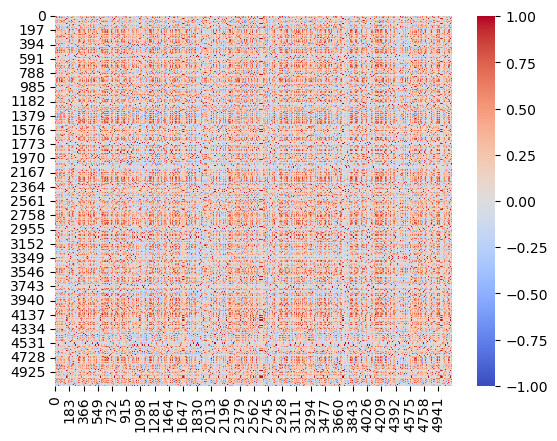

In [76]:
import seaborn as sns   

sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1)